Name : Yason Dawson Imawan 

Data Engineering Fellowship - IYKRA

# Case Number 1

Using Dataset A above, The table given to you cannot be updated, so if there is a change in the status of a transaction the new data is inserted instead of updating the status of the transaction, it will insert a new row with the same id and insert time based on the time when the row is inserted. You are assigned to create a view that only shows the most updated transactions for each id, so there is no duplicate id inside the view.

In [105]:
import sqlite3
def data_transacation(case_1):
  conn = sqlite3.connect(case_1)
  cursor = conn.cursor()
  cursor.execute('''CREATE TABLE IF NOT EXISTS transactions(
   tx_id INT PRIMARY KEY,
   id INT NOT NULL,
   insert_time NOT NULL,
   tx_amount FLOAT NOT NULL,
   tx_type TEXT NOT NULL,
   status TEXT NOT NULL)''')
  conn.commit()

  conn = sqlite3.connect(case_1)
  cursor = conn.cursor()
  sqlite_insert_query = """INSERT INTO transactions
                          (tx_id,id, insert_time, tx_amount, tx_type, status) 
                          VALUES (?, ?, ?, ?, ?, ?)"""
  recordsToInsert =  [(1, '2021-07-01', 2000, 'buy', 'open'),
          (2, '2021-07-02', 3000, 'buy', 'open'),
          (3, '2021-07-03', 4000, 'buy', 'open'),
          (4, '2021-07-04', 5000, 'buy', 'open'),
          (1, '2021-07-05', 6000, 'sell', 'closed'),
          (2, '2021-07-06', 7000, 'sell', 'closed'),
          (3, '2021-07-07', 8000, 'sell', 'closed'),
          (4, '2021-07-08', 9000, 'sell', 'closed'),
          (5, '2021-07-09', 10000, 'buy', 'open'),
          (6, '2021-07-10', 11000, 'buy', 'open')]
  cursor.executemany(sqlite_insert_query, recordsToInsert)   
  conn.commit()

  cursor.execute('''SELECT id, max(insert_time) as insert_time, tx_amount, tx_type, status from transactions group by id''')
  for row in cursor.fetchall():
    print(row)
view_update_transaction('case_1_tx.db')

(1, '2021-06-28 12:54:33', 20.0, 'sell', 'close')
(2, '2021-06-28 09:20:00', 10.0, 'sell', 'close')
(3, '2021-06-28 09:55:31', 20.0, 'sell', 'close')
(4, '2021-06-28 14:01:14', 10.0, 'sell', 'close')
(5, '2021-06-28 12:31:00', 60.0, 'buy', 'open')


#Case Number 2

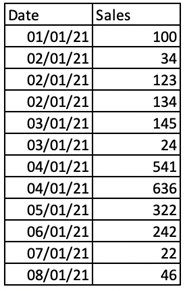

In [106]:
con =sqlite3.connect('case_1.db')
cursor = conn.cursor()

In [107]:
cursor.execute('''CREATE TABLE IF NOT EXISTS sales
                (Date DATE, Sales INT)''')
sales_values = [('2021-01-01', 100),
                ('2021-01-02', 34),
                ('2021-01-02', 123),
                ('2021-01-02', 134),
                ('2021-01-03', 145),
                ('2021-01-03', 24),
                ('2021-01-04', 541),
                ('2021-01-04', 636),
                ('2021-01-05', 322),
                ('2021-01-06', 242),
                ('2021-01-07', 22),
                ('2021-01-08', 46),]
cursor.executemany('''INSERT INTO sales values (?,?)''', sales_values)
con.commit()
sales_values

[('2021-01-01', 100),
 ('2021-01-02', 34),
 ('2021-01-02', 123),
 ('2021-01-02', 134),
 ('2021-01-03', 145),
 ('2021-01-03', 24),
 ('2021-01-04', 541),
 ('2021-01-04', 636),
 ('2021-01-05', 322),
 ('2021-01-06', 242),
 ('2021-01-07', 22),
 ('2021-01-08', 46)]

Using Dataset B above, Write a query to get the rolling sum total of sales using the window function!

# Case Number 3

Using Dataset C above, write a code with following requirements:
a.	Your task is to create an automation (python script preferable) that convert JSON file above into three CSV files below:

CSV_1 :
user_id,tx_id
1,1
1,3
1,5
2,2
2,4
2,6

CSV_2 :
Id,name,email
1,agus,agus@example.com
2,asep,asep@example.com

CSV_3 :
Id,tx_date,tx_amount,tx_type
1,2020-01-01,10,buy
2,2020-01-01,10,sell
3,2020-02-01,10,buy
4,2020-02-01,10,sell
5,2020-03-01,20,sell
6,2020-03-01,20,buy


In [108]:
data=[
      {
       "user": {
           "id": 1,
           "name": "agus",
           "email": "agus@example.com"
       },
       "txs": [
           {
               "id": 1,
               "tx_date": "2020-01-01",
               "tx_amount": 10,
               "tx_type": "buy"
           },
           {
               "id": 3,
               "tx_date": "2020-02-01",
               "tx_amount": 10,
               "tx_type": "buy"
           },
           {
               "id": 5,
               "tx_date": "2020-03-01",
               "tx_amount": 20,
               "tx_type": "sell"
           }
       ]
   },
   {
       "user": {
           "id": 2,
           "name": "asep",
           "email": "asep@example.com"
       },
       "txs": [
           {
               "id": 2,
               "tx_date": "2020-01-01",
               "tx_amount": 10,
               "tx_type": "sell"
           },
           {
               "id": 4,
               "tx_date": "2020-02-01",
               "tx_amount": 10,
               "tx_type": "sell"
           },
           {
               "id": 6,
               "tx_date": "2020-03-01",
               "tx_amount": 20,
               "tx_type": "buy"
           }
       ]
   }
]

In [109]:
import pandas as pd
tabel = pd.json_normalize(data,'txs',[['user','email'],['user','id'],['user','name']])
tabel

,id,tx_date,tx_amount,tx_type,user.email,user.id,user.name
0,1,2020-01-01,10,buy,agus@example.com,1,agus
1,3,2020-02-01,10,buy,agus@example.com,1,agus
2,5,2020-03-01,20,sell,agus@example.com,1,agus
3,2,2020-01-01,10,sell,asep@example.com,2,asep
4,4,2020-02-01,10,sell,asep@example.com,2,asep
5,6,2020-03-01,20,buy,asep@example.com,2,asep


In [110]:
#untuk point A
csv_1=tabel[['user.id','id']]
csv_1.columns=['user_id','tx_id']
csv_1.to_csv('point A.csv',index=False)
csv_1

,user_id,tx_id
0,1,1
1,1,3
2,1,5
3,2,2
4,2,4
5,2,6


In [111]:
#Untuk poin B
csv_2 =tabel[['user.id','user.name','user.email']].drop_duplicates().reset_index(drop=True)
csv_2.columns=['id','name','email']
csv_2.to_csv('point B.csv',index=False)
csv_2

,id,name,email
0,1,agus,agus@example.com
1,2,asep,asep@example.com


In [112]:
#Untuk Point C
csv_3=tabel[['id','tx_date','tx_amount','tx_type']].sort_values('id').reset_index(drop=True)
csv_3.to_csv('Point C.csv',index=False)
csv_3

,id,tx_date,tx_amount,tx_type
0,1,2020-01-01,10,buy
1,2,2020-01-01,10,sell
2,3,2020-02-01,10,buy
3,4,2020-02-01,10,sell
4,5,2020-03-01,20,sell
5,6,2020-03-01,20,buy


# References



1.   https://www.sqlitetutorial.net/sqlite-python/creating-database/
2.   https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd

1.   https://www.sqlshack.com/learn-mysql-add-data-in-tables-using-the-insert-statement/
2.   https://docs.python.org/3/library/sqlite3.html

1.   https://pynative.com/python-sqlite/
2.   https://www.geeksforgeeks.org/convert-json-to-csv-in-python/









# Thank you for my DE team and Muhammad Kuzain